<a href="https://colab.research.google.com/github/dariakrtn/AI_2022/blob/main/lab_5_em.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. *Импорт библиотек*

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture

%matplotlib inline

data_size = 1000

# *1. Генерация данных*

### *Равномерное распределение*

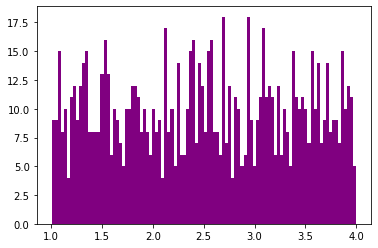

In [2]:
clust_a = np.random.uniform(1, 4, size=data_size)
a_hist = plt.hist(clust_a, bins=100, color='purple')

### *Гаусиана*

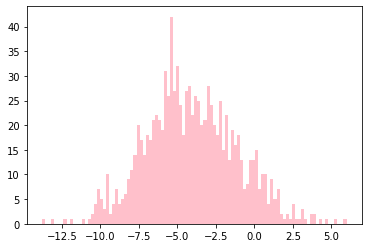

In [3]:
gaus_dist_clustter_a = np.random.normal(-4, 3, size=data_size)
b_hist = plt.hist(gaus_dist_clustter_a, bins=100, color='pink')

### *Распределение с двумя пиками*

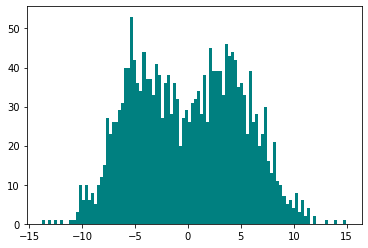

In [4]:
gaus_dist_clustter_b = np.random.normal(4, 3, size=data_size)

gaus_dist = np.hstack((gaus_dist_clustter_a, gaus_dist_clustter_b))

a_hist = plt.hist(gaus_dist, bins=100, color='teal')

# *2. Реализация алгоритма Парзена Розенблата*

In [5]:
def probability_density(x):
    return 1 / ((2 * math.pi) ** 0.5) * np.exp(-1/2 * (x ** 2))

In [6]:
def EM(x, h, data):
    return sum([probability_density((x - i) / h) for i in data]) / (len(data) * h)

### *Востанавливаем плотность на Гаусане*

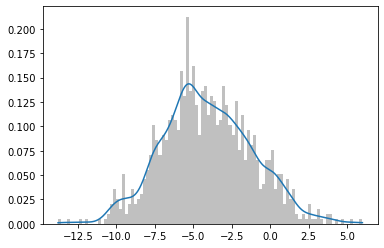

In [7]:
x = np.linspace(min(gaus_dist_clustter_a), max(gaus_dist_clustter_a), len(gaus_dist_clustter_a))

plt.hist(gaus_dist_clustter_a, bins=100, density=True, color='silver')
plt.plot(x, EM(x, 0.5, gaus_dist_clustter_a))

### *Востанавливаем плотность на тестовых данных*

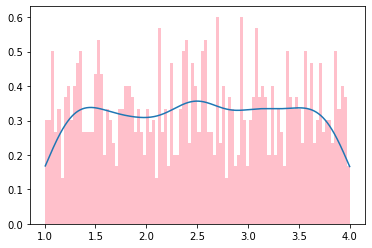

In [8]:
x = np.linspace(min(clust_a), max(clust_a), len(clust_a))

plt.hist(clust_a, bins=100, density=True, color='pink')
plt.plot(x, EM(x, 0.2, clust_a))

# *3. Оптимизация ширины окна методом LOO*

2486.037025860743

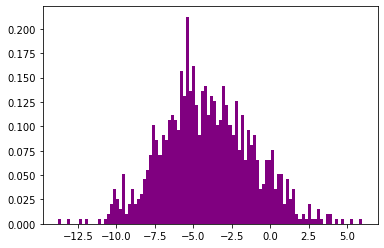

In [9]:
def LOO(data: list, h: float) -> float:
    return -sum([math.log(EM(data[i], h, data)) for i in range(len(data))])

plt.hist(gaus_dist_clustter_a, bins=100, density=True, color='purple')
LOO(gaus_dist_clustter_a, 0.5)

# *4. Применение EM алгоритма из sklearn для данных с двумя пиками*

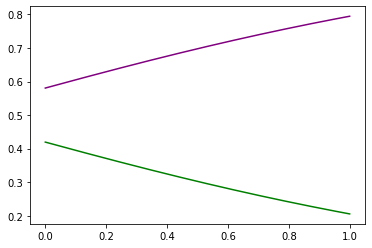

In [12]:
gaus_dist = gaus_dist.reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0).fit(gaus_dist)

x = np.linspace(0, 1, 1000)
y_green = gm.predict_proba(np.array(x).reshape(-1, 1))[:,0]
y_purple = gm.predict_proba(np.array(x).reshape(-1, 1))[:,1]

plt.plot(x, y_green, color = 'green')
plt.plot(x, y_purple, color = 'purple')